<h1> How are employees with different roles treated and affected
</h1>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 200)
df = pd.read_csv("./Data/combined2.csv")
unique_questions = df.groupby('QuestionID')['questiontext'].agg('first').reset_index()

#unique_questions


C:\Users\samir\AppData\Local\Temp\ipykernel_17520\810082878.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Questions that are used to identify data suitability and user roles
#ID: 9. Is your employer primarily a tech organisation?
#ID: 13. Is your primary role within your company related to tech/IT?
#ID: 68. Was your employer primarily a tech tech company/organization?
#ID: 117. Which of the following best describes your work position?

questionIDs = [9,13,68,117]
# Get all the unique answers for each question ID
for questionID in questionIDs:
    unique_answers = df[df['QuestionID'] == questionID]['AnswerText'].unique()
    print(f"Question ID: {questionID}")
    print("Unique Answers:")
    for answer in unique_answers:
        print(answer)
    print()




Question ID: 9
Unique Answers:
1
0
-1

Question ID: 13
Unique Answers:
-1
1
0

Question ID: 68
Unique Answers:
0
1
-1

Question ID: 117
Unique Answers:
Back-end Developer
Front-end Developer
Supervisor/Team Lead
Executive Leadership
Dev Evangelist/Advocate
DevOps/SysAdmin
Support
Designer
One-person shop
Other
Sales
HR



Years asked: 2014, 2016, 2017, 2018, 2019


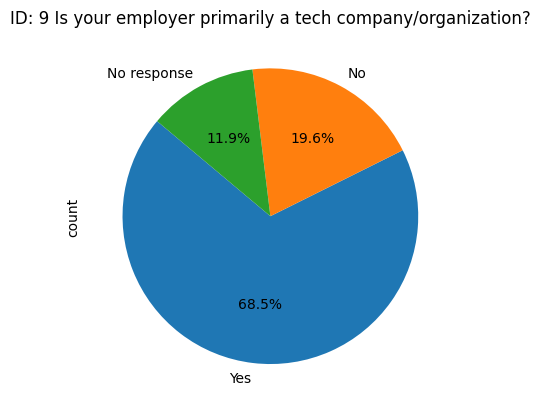

Years asked: 2016, 2017, 2018, 2019


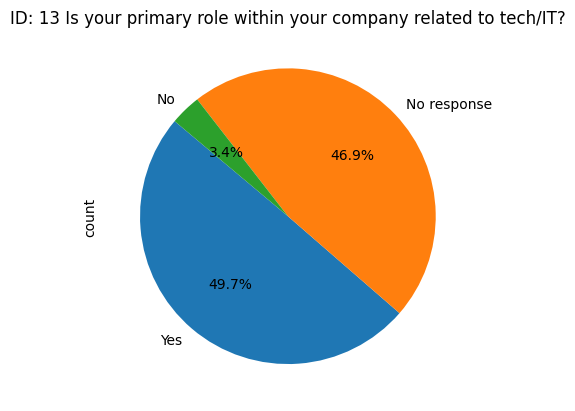

Years asked: 2017, 2018, 2019


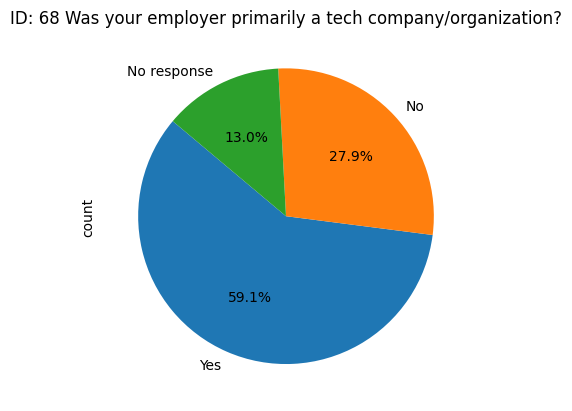

In [3]:
#Making sure data is suitable
normalization_mapping = {
    '-1': 'No response',  # Treating '-1' as "no response"
    '1': 'Yes',
    '0': 'No',
   "Some of them":"Some",
   "None of them":"None",
   "Don't know":"Not sure",
   "Yes, all of them":"Yes, all"
  
    
}


preliminary_data = [9,13,68]
for question_id in preliminary_data:
    df['AnswerText'] = df['AnswerText'].replace(normalization_mapping)
    unique_survey_ids = df[df['QuestionID'] == question_id]['SurveyID'].unique()
    print("Years asked:", ", ".join(map(str, unique_survey_ids)))
    df[df['QuestionID'] == question_id]['AnswerText'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
    question_text = df[df['QuestionID'] == question_id]['questiontext'].iloc[0]
    plt.title("ID: " + str(question_id) + " " + question_text )
    plt.show()




<h2>Notes on preliminary data</h2>
<ul>
  <li>Above 60% of user responses are from employees in a tech company.</li>
  <li>50% of user responses work primarily with tech.</li>
</ul>

Years asked: 2017, 2018, 2019


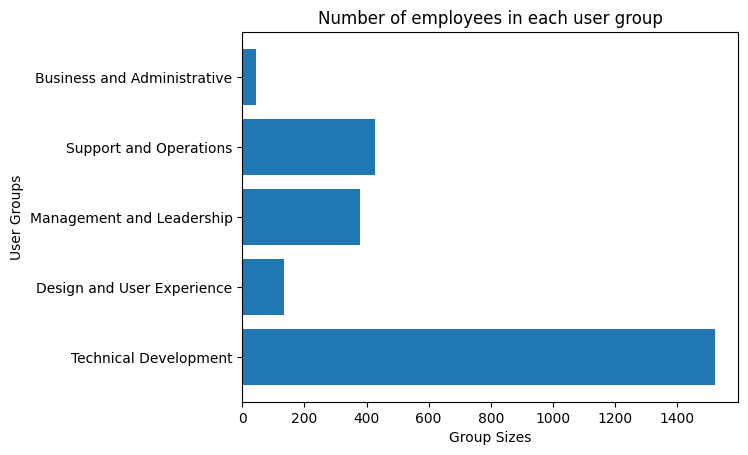

In [4]:
#user roles will be generalised in the following categories
# Technical Development:
    # Back-end Developer
    # Front-end Developer
    # DevOps/SysAdmin
    
# Design and User Experience:
    # Designer
    
# Management and Leadership:
    # Supervisor/Team Lead
    # Executive Leadership
    
# Support and Operations:
    # Dev Evangelist/Advocate
    # Support
    # One-person shop (as they typically handle support and operational tasks as well)
    
# Business and Administrative:
    # Sales
    # HR
    # Other roles not directly related to product development or operations
    

unique_answers = df[df['QuestionID'] == 117]['AnswerText'].unique()
unique_survey_ids = df[df['QuestionID'] == question_id]['SurveyID'].unique()
print("Years asked:", ", ".join(map(str, unique_survey_ids)))

# Create dictionaries to map answers to user groups
technical_development = ['Back-end Developer', 'Front-end Developer', 'DevOps/SysAdmin']
design_and_ux = ['Designer']
management_and_leadership = ['Supervisor/Team Lead', 'Executive Leadership']
support_and_operations = ['Dev Evangelist/Advocate', 'Support', 'One-person shop']
business_and_administrative = ['Sales', 'HR']


user_groups = {
    'Technical Development': [],
    'Design and User Experience': [],
    'Management and Leadership': [],
    'Support and Operations': [],
    'Business and Administrative': []
}


for answer in unique_answers:
    if answer in technical_development:
        user_groups['Technical Development'].extend(df[(df['QuestionID'] == 117) & (df['AnswerText'] == answer)]['UserID'].tolist())
    elif answer in design_and_ux:
        user_groups['Design and User Experience'].extend(df[(df['QuestionID'] == 117) & (df['AnswerText'] == answer)]['UserID'].tolist())
    elif answer in management_and_leadership:
        user_groups['Management and Leadership'].extend(df[(df['QuestionID'] == 117) & (df['AnswerText'] == answer)]['UserID'].tolist())
    elif answer in support_and_operations:
        user_groups['Support and Operations'].extend(df[(df['QuestionID'] == 117) & (df['AnswerText'] == answer)]['UserID'].tolist())
    elif answer in business_and_administrative:
        user_groups['Business and Administrative'].extend(df[(df['QuestionID'] == 117) & (df['AnswerText'] == answer)]['UserID'].tolist())


# for group, user_ids in user_groups.items():
#     print(f"{group}: {user_ids}")


group_sizes = [len(users) for group, users in user_groups.items()]
group_names = list(user_groups.keys())

plt.barh(group_names, group_sizes)
plt.xlabel('Group Sizes')
plt.ylabel('User Groups')
plt.title('Number of employees in each user group')
plt.show()





<h2>Info on users</h2>
<ul>
  <li>ID: 6 Do you have a family history of mental illness?</li>
  <li>ID: 7 Have you ever sought treatment for a mental health disorder from a mental health professional?</li>
  <li>ID: 32 Have you had a mental health disorder in the past?</li>
  <li>ID: 33 Do you currently have a mental health disorder?</li>
  <li>ID: 34 Have you ever been diagnosed with a mental health disorder?</li>
  <li>ID: 78 Are you openly identified at work as a person with a mental health issue?</li>
  <li>ID: 115 If yes, what condition(s) have you been diagnosed with?</li>
</ul>



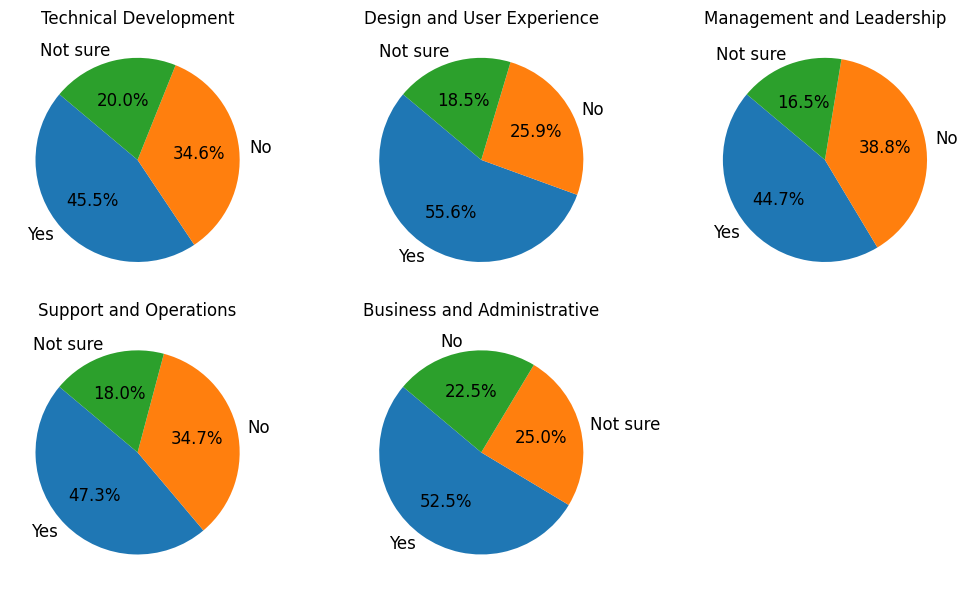

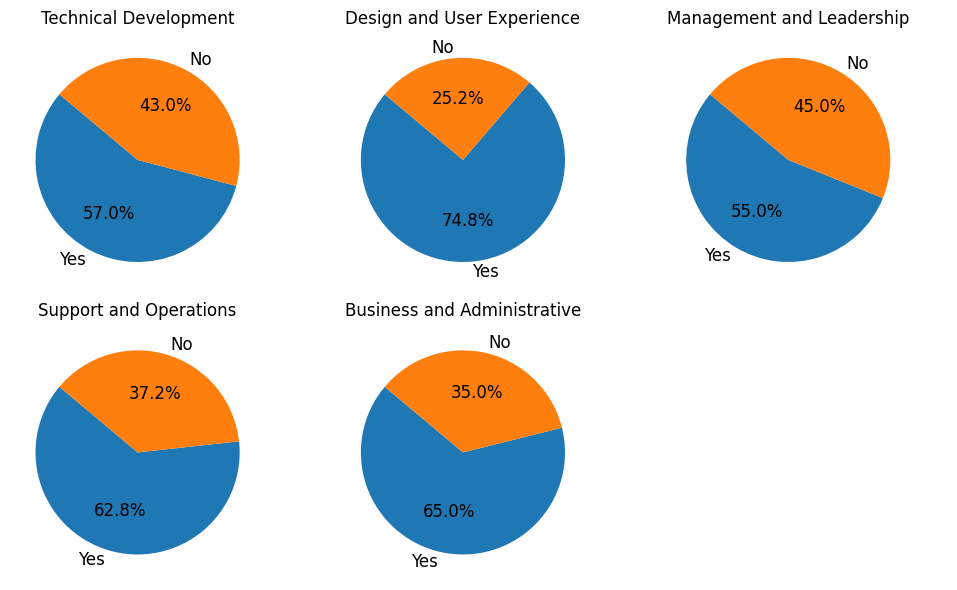

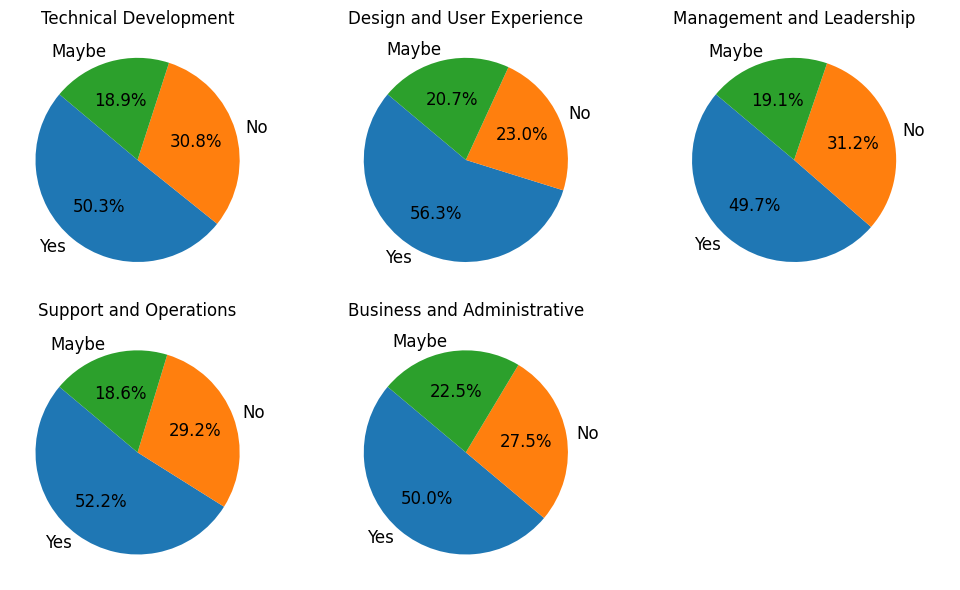

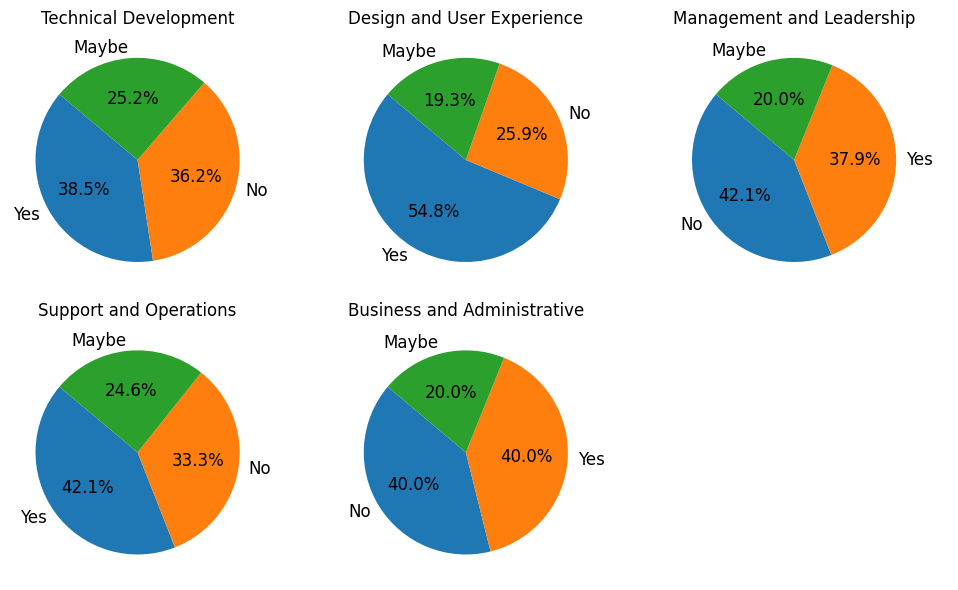

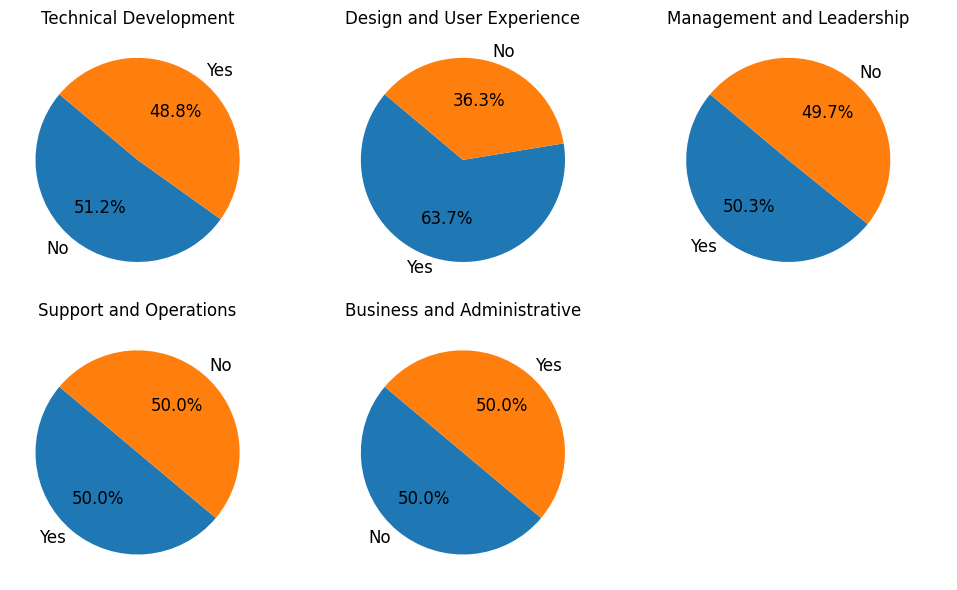

In [5]:


userInfoIds = [6, 7, 32, 33, 34]
for question_id in userInfoIds:
    # Get the answers for question 18
    answers = df[df['QuestionID'] == question_id]

    # Initialize a dictionary to store the counts for each group
    group_counts = {}

    # Iterate over the user groups
    for group, users in user_groups.items():
        # Filter the answers for the users in the group
        group_answers = answers[answers['UserID'].isin(users)]
        # Count the unique answers for the group
        group_counts[group] = group_answers['AnswerText'].value_counts()

    # Combine all pie charts into one figure
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
    question_text = df[df['QuestionID'] == question_id]['questiontext'].iloc[0]
    #fig.suptitle("ID: " + str(question_id) + " " + question_text, fontsize=16)  # Increase the fontsize to 16
    # Iterate over the user groups
    for i, (group, counts) in enumerate(group_counts.items()):
        # Plot the pie chart for each group
        ax = axes[i // 3, i % 3]
        counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=ax, fontsize=12)
        ax.set_title(group, fontsize=12)
        ax.set_ylabel('')
    ax = axes[5 // 3, 5 % 3]
    ax.axis('off')
    plt.tight_layout()
    plt.show()  



    

<h2>Questions for each group</h2>


<ul>
    <li>15: Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?</li>
    <li>18: Would you feel comfortable discussing a mental health issue with your coworkers?</li>
    <li>19: Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?</li>
    <li>25: Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?</li>
    <li>28: Would you have been willing to discuss your mental health with your direct supervisor(s)?</li>
    <li>31: Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?</li>
    <li>58: Have you ever discussed your mental health with your employer?</li>
    <li>60: Have you ever discussed your mental health with coworkers?</li>
    <li>62: Have you ever had a coworker discuss their or another coworker's mental health with you?</li>
    <li>70: Did you ever discuss your mental health with your previous employer?</li>
    <li>72: Did you ever discuss your mental health with a previous coworker(s)?</li>
    <li>74: Did you ever have a previous coworker discuss their or another coworker's mental health with you?</li>
    <li>90: Do you think that discussing a physical health issue with your employer would have negative consequences?</li>
    <li>95: Has your employer ever discussed mental health as part of an employee wellness program?</li>
    <li>98: Do you think that discussing a mental health issue with your employer would have negative consequences?</li>
    <li>99: Would you be willing to discuss a mental health issue with your coworkers?</li>
    <li>100: Would you be willing to discuss a mental health issue with your direct supervisor(s)?</li>
    <li>104: Do you think that discussing a mental health disorder with your employer would have negative consequences?</li>
    <li>108: Do you think that discussing a mental health disorder with previous employers would have negative consequences?</li>
    <li>109: Do you think that discussing a physical health issue with previous employers would have negative consequences?</li>
    <li>110: Would you have been willing to discuss a mental health issue with your previous co-workers?</li>
</ul>

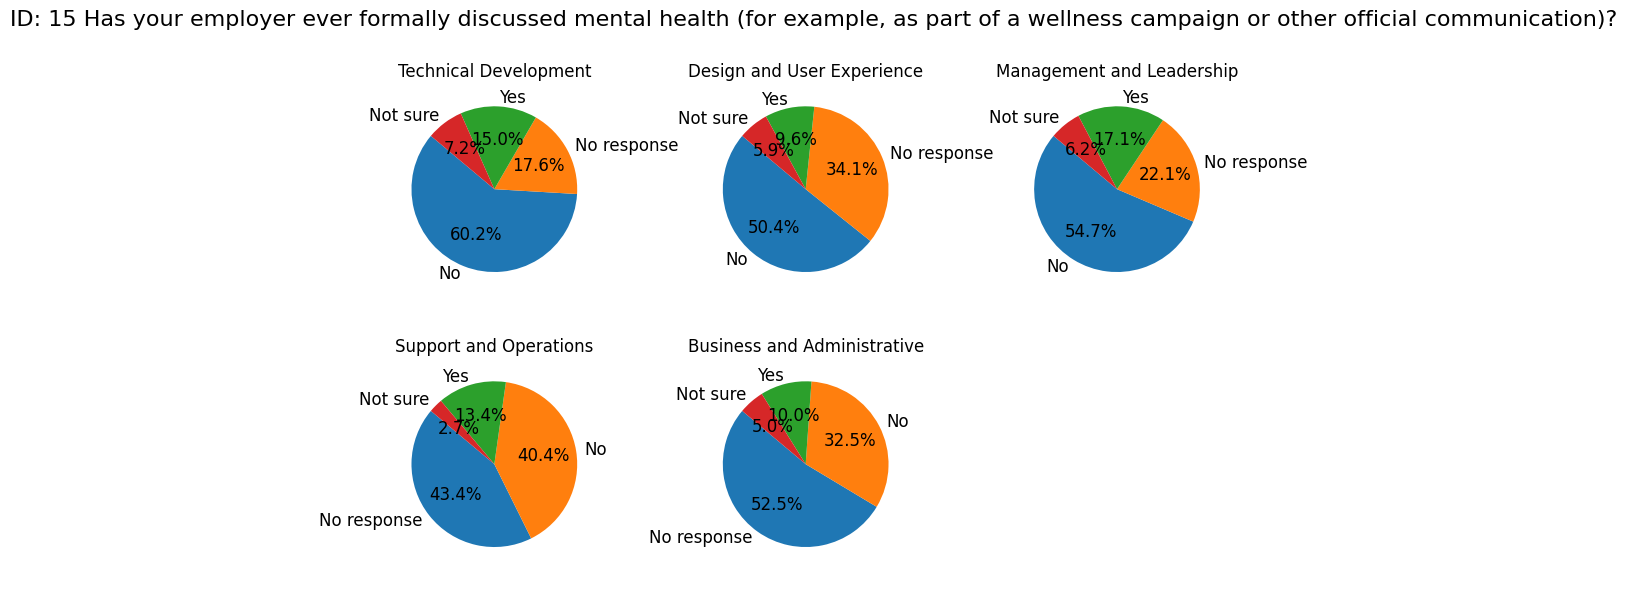

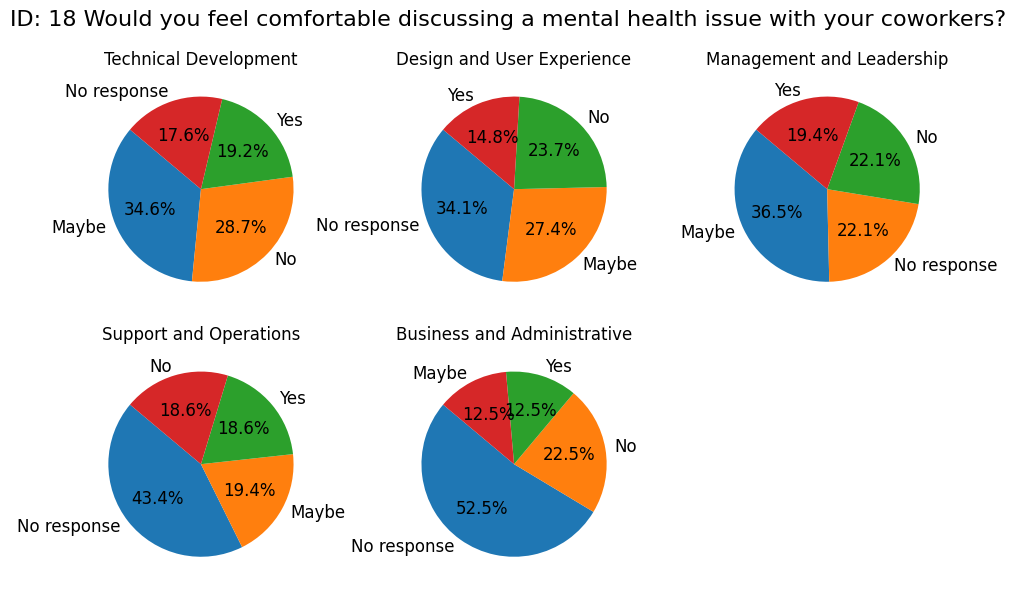

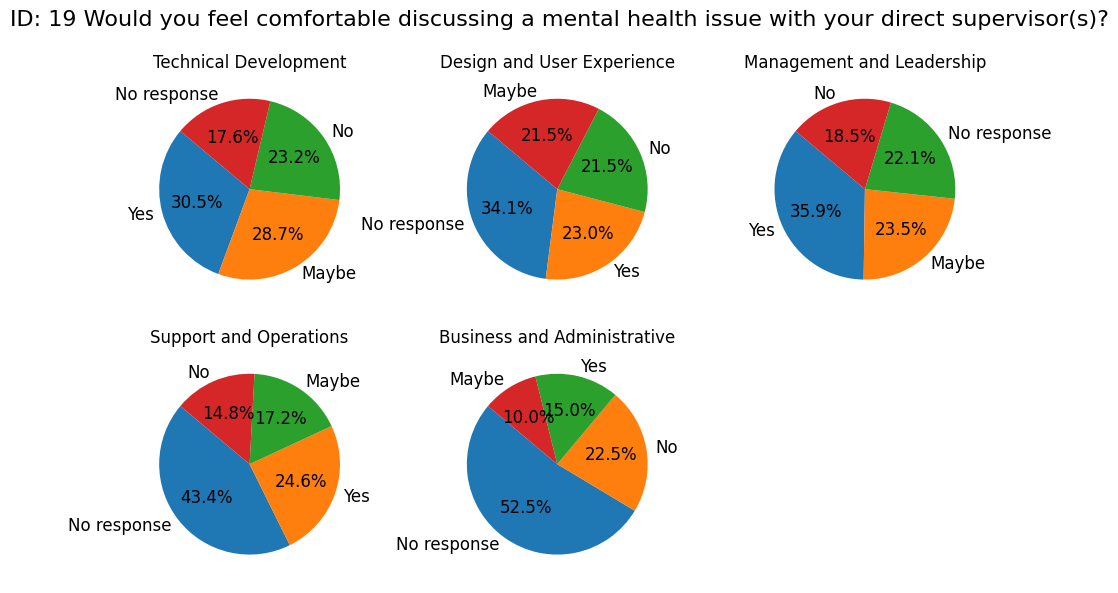

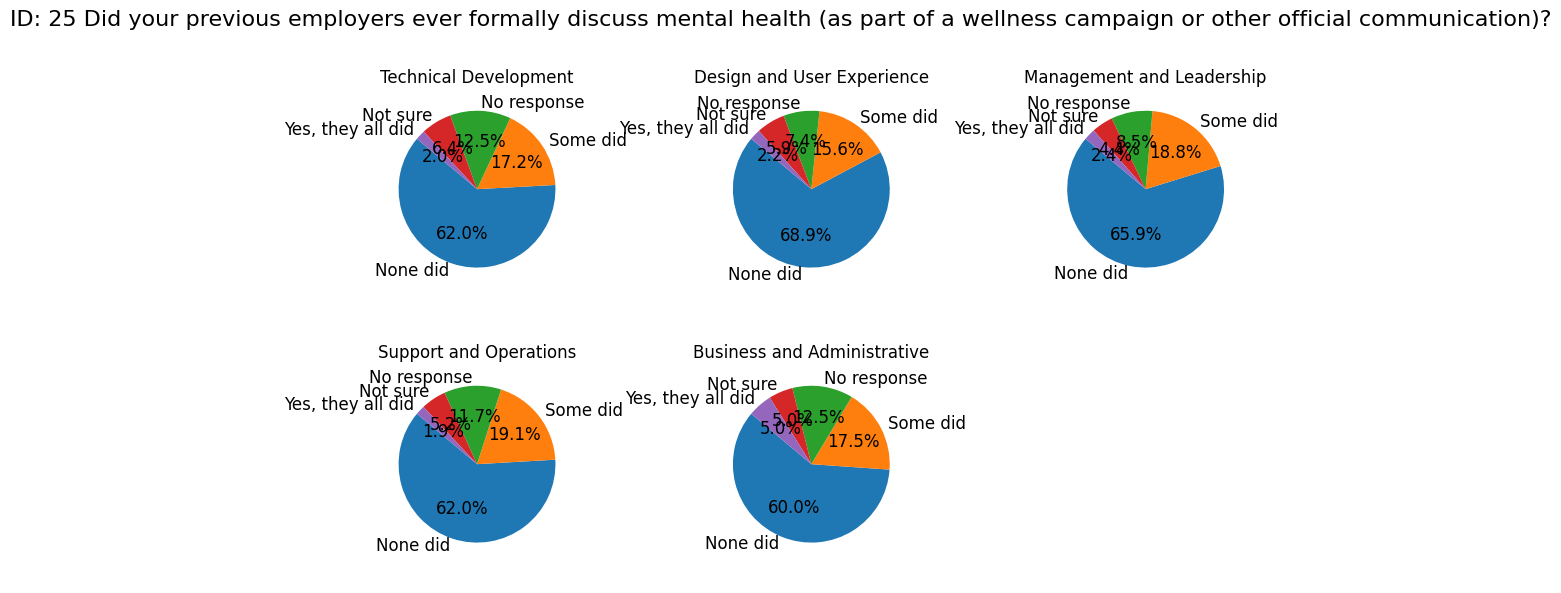

C:\Users\samir\AppData\Local\Temp\ipykernel_17520\1895365517.py:48: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


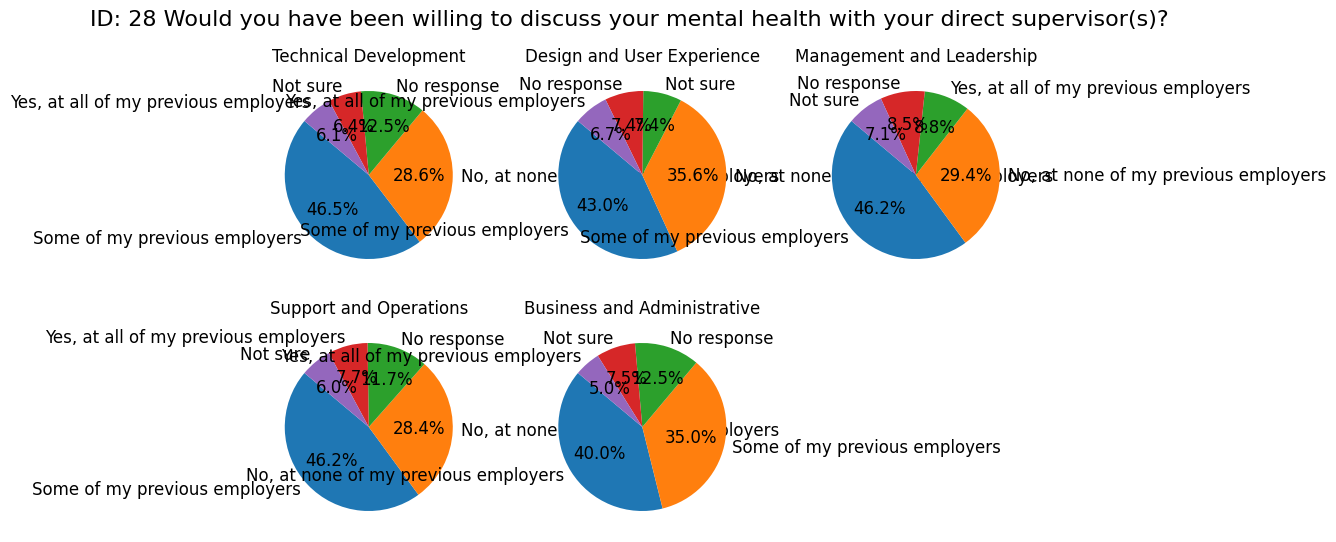

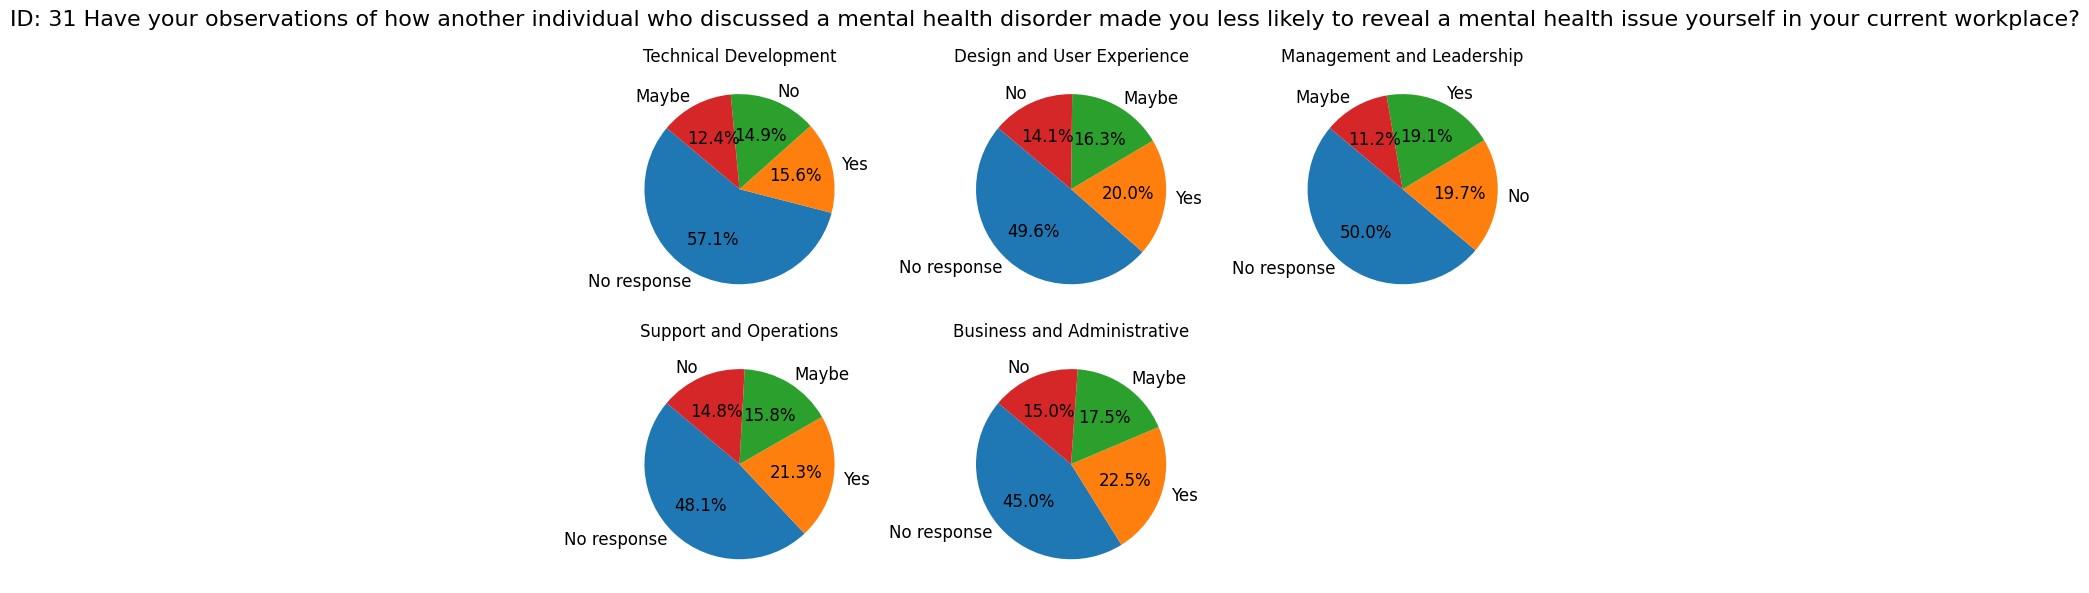

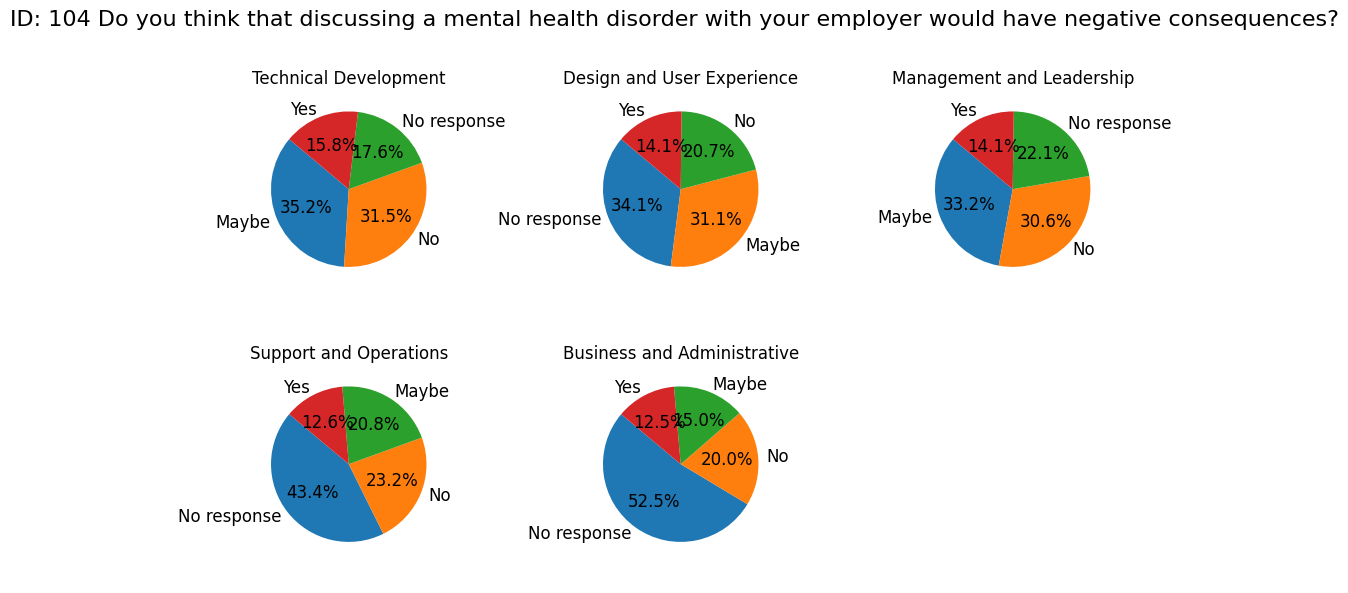

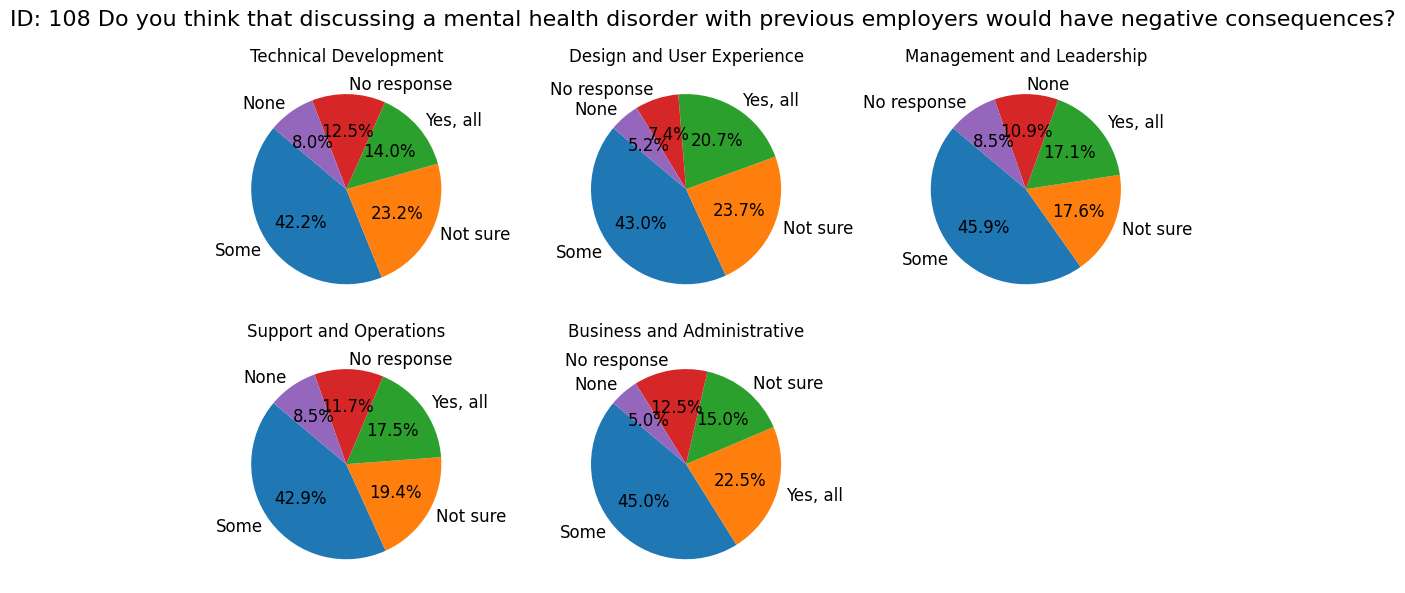

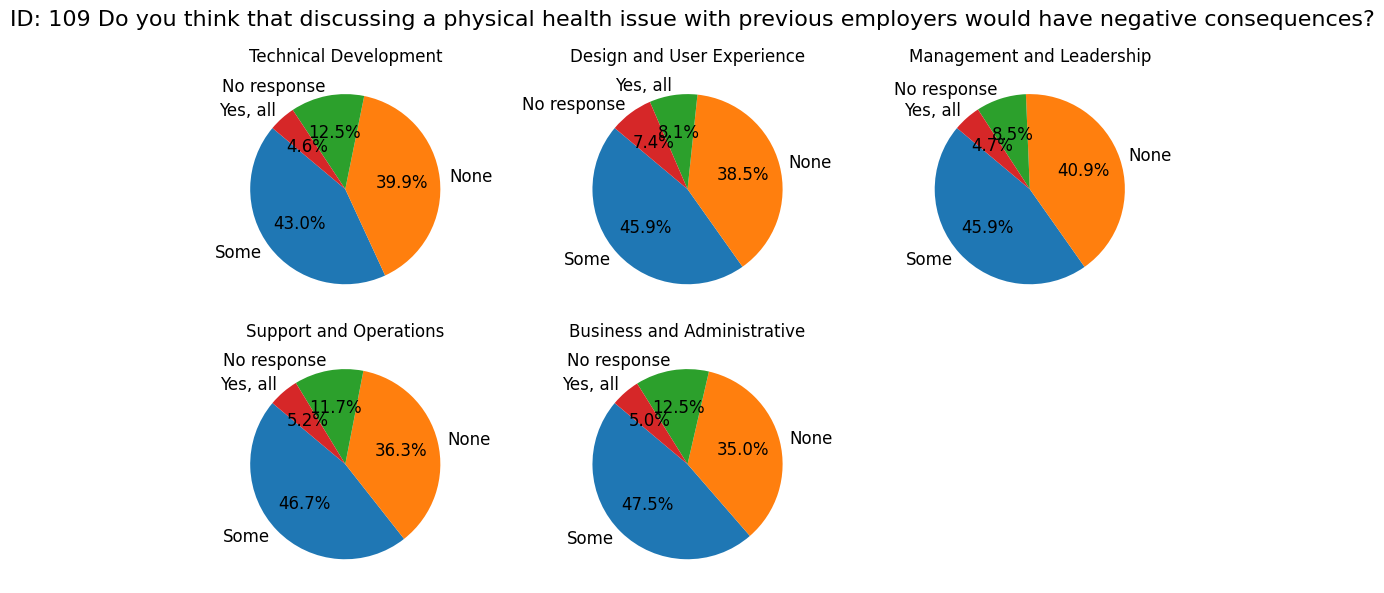

C:\Users\samir\AppData\Local\Temp\ipykernel_17520\1895365517.py:48: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


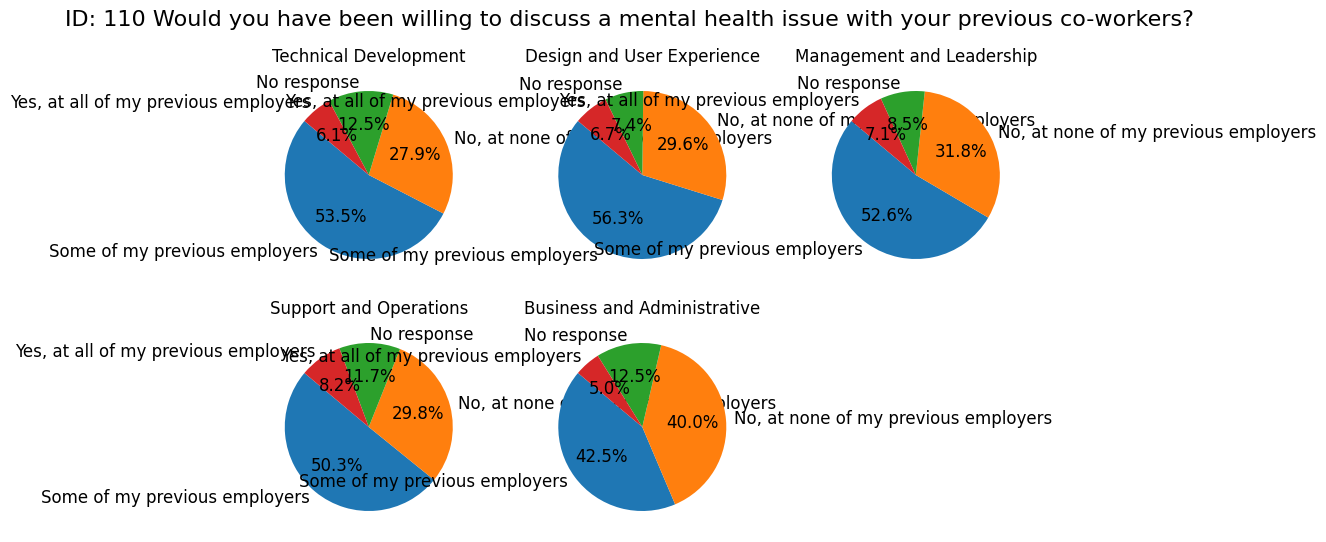

In [6]:
question_ids = [15, 18, 19, 25, 28, 31,104, 108, 109, 110]
for question_id in question_ids:
    # Get the answers for question 18
    answers = df[df['QuestionID'] == question_id]

    # Initialize a dictionary to store the counts for each group
    group_counts = {}

    # Iterate over the user groups
    for group, users in user_groups.items():
        # Filter the answers for the users in the group
        group_answers = answers[answers['UserID'].isin(users)]
        # Count the unique answers for the group
        group_counts[group] = group_answers['AnswerText'].value_counts()

        # Plot the line graph for each group
        # Plot the line graph for each group

   # Combine all pie charts into one figure
    # fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    # question_text = df[df['QuestionID'] == question_id]['questiontext'].iloc[0]
    # fig.suptitle("ID: " + str(question_id) + " " + question_text)
    # # Iterate over the user groups
    # for i, (group, counts) in enumerate(group_counts.items()):
    #     # Plot the pie chart for each group
    #     ax = axes[i // 3, i % 3]
    
    #     counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=ax)
    #     ax.set_title(group)
    #     ax.set_ylabel('')
    # ax = axes[5 // 3, 5 % 3]
    # ax.axis('off')
    # plt.tight_layout()
    # plt.show()
   
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
    question_text = df[df['QuestionID'] == question_id]['questiontext'].iloc[0]
    fig.suptitle("ID: " + str(question_id) + " " + question_text, fontsize=16)  # Increase the fontsize to 16
    # Iterate over the user groups
    for i, (group, counts) in enumerate(group_counts.items()):
        # Plot the pie chart for each group
        ax = axes[i // 3, i % 3]
        counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=ax, fontsize=12)
        ax.set_title(group, fontsize=12)
        ax.set_ylabel('')
    ax = axes[5 // 3, 5 % 3]
    ax.axis('off')
    plt.tight_layout()
    plt.show()

 
 




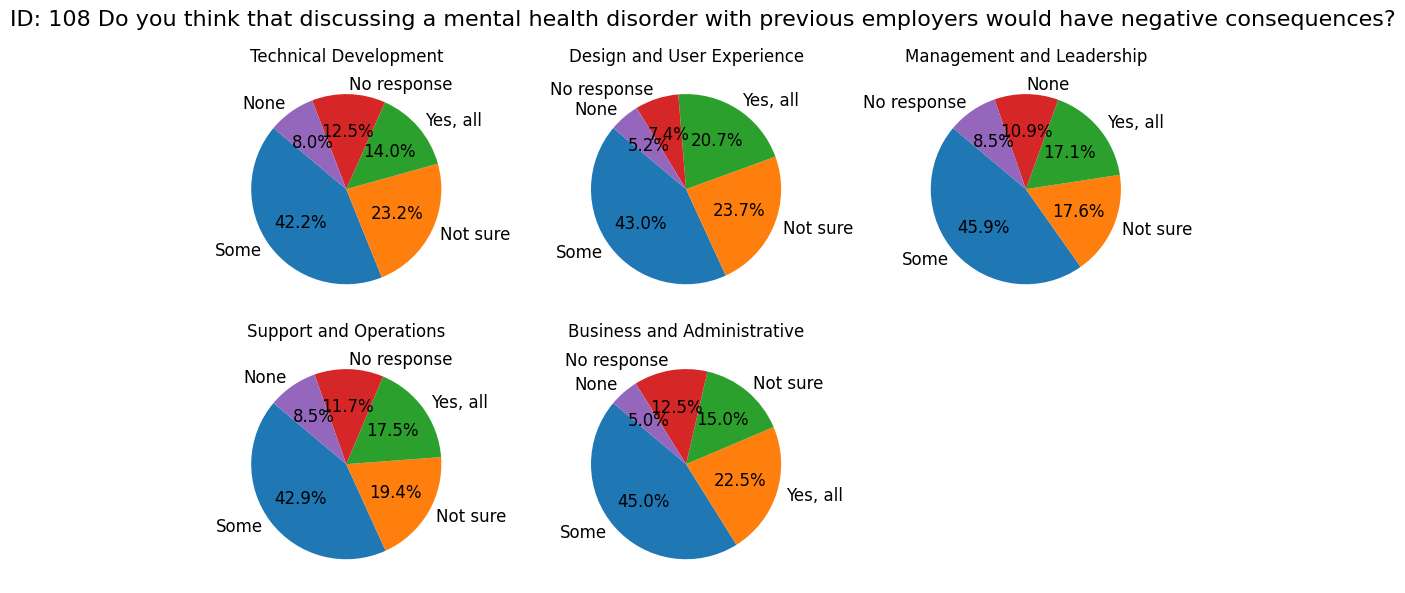

In [7]:



df['AnswerText'] = df['AnswerText'].replace(normalization_mapping)
answers = df[df['QuestionID'] == 108]

# Initialize a dictionary to store the counts for each group
group_counts = {}

# Iterate over the user groups
for group, users in user_groups.items():
    # Filter the answers for the users in the group
    group_answers = answers[answers['UserID'].isin(users)]
    # Count the unique answers for the group
    group_counts[group] = group_answers['AnswerText'].value_counts()

    # Plot the line graph for each group

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
question_text = df[df['QuestionID'] == 108]['questiontext'].iloc[0]
fig.suptitle("ID: " + str(108) + " " + question_text, fontsize=16)  # Increase the fontsize to 16
# Iterate over the user groups
for i, (group, counts) in enumerate(group_counts.items()):
    # Plot the pie chart for each group
    ax = axes[i // 3, i % 3]
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=ax, fontsize=12)
    ax.set_title(group, fontsize=12)
    ax.set_ylabel('')
ax = axes[5 // 3, 5 % 3]
ax.axis('off')
plt.tight_layout()
plt.show()

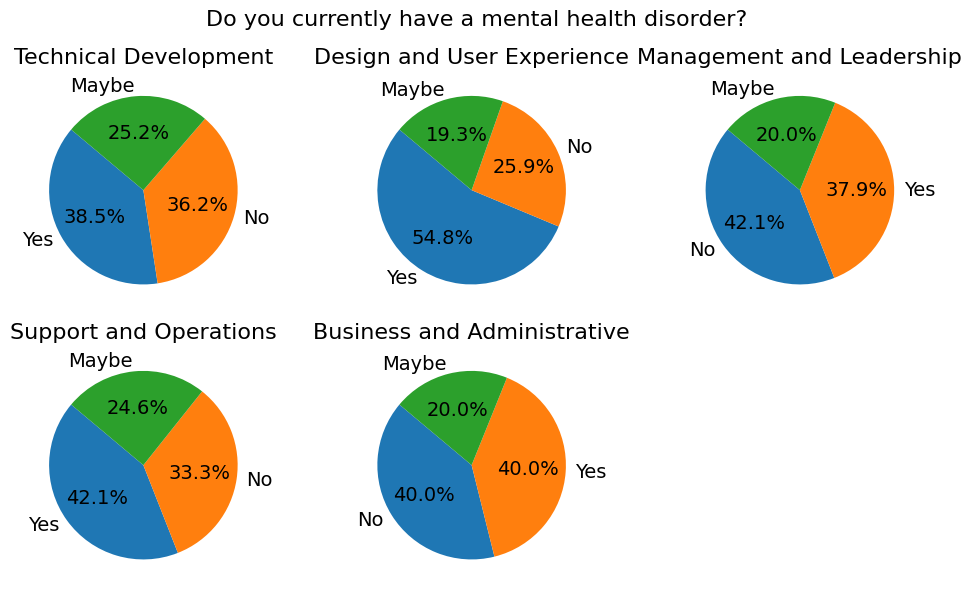

In [8]:
# Get the answers for question 18
question_id = 33
answers = df[df['QuestionID'] == question_id]

# Initialize a dictionary to store the counts for each group
group_counts = {}

# Iterate over the user groups
for group, users in user_groups.items():
    # Filter the answers for the users in the group
    group_answers = answers[answers['UserID'].isin(users)]
    # Count the unique answers for the group
    group_counts[group] = group_answers['AnswerText'].value_counts()

# Combine all pie charts into one figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
question_text = df[df['QuestionID'] == question_id]['questiontext'].iloc[0]
fig.suptitle(question_text, fontsize=16)  # Increase the fontsize to 16
# Iterate over the user groups
for i, (group, counts) in enumerate(group_counts.items()):
    # Plot the pie chart for each group
    ax = axes[i // 3, i % 3]
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=ax, fontsize=14)
    ax.set_title(group, fontsize=16)
    ax.set_ylabel('')
ax = axes[5 // 3, 5 % 3]
ax.axis('off')
plt.tight_layout()
plt.show()  


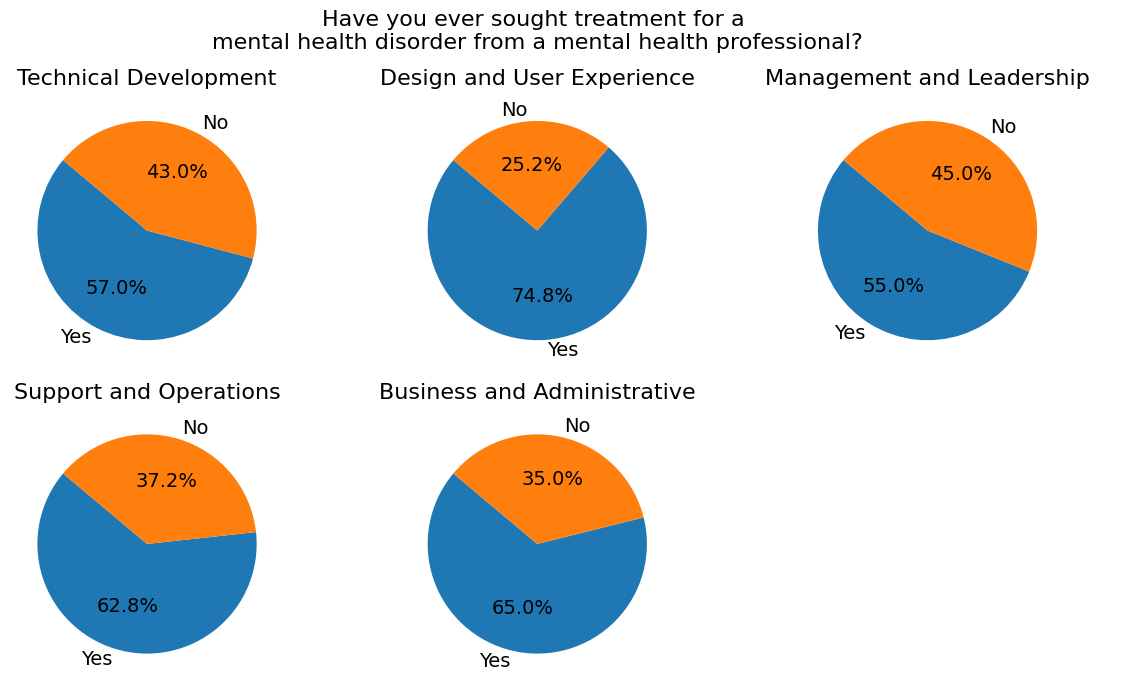

In [9]:
# Get the answers for question 18
question_id = 7
answers = df[df['QuestionID'] == question_id]

# Initialize a dictionary to store the counts for each group
group_counts = {}

# Iterate over the user groups
for group, users in user_groups.items():
    # Filter the answers for the users in the group
    group_answers = answers[answers['UserID'].isin(users)]
    # Count the unique answers for the group
    group_counts[group] = group_answers['AnswerText'].value_counts()

# Combine all pie charts into one figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
question_text = df[df['QuestionID'] == question_id]['questiontext'].iloc[0]

question_text = question_text[:37] + "\n"+question_text[37:]
fig.suptitle(question_text, fontsize=16)  # Increase the fontsize to 16
# Iterate over the user groups
for i, (group, counts) in enumerate(group_counts.items()):
    # Plot the pie chart for each group
    ax = axes[i // 3, i % 3]
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=ax, fontsize=14,figsize=(12, 7))
    ax.set_title(group, fontsize=16)
    ax.set_ylabel('')
ax = axes[5 // 3, 5 % 3]
ax.axis('off')
plt.tight_layout()
plt.show()  


 


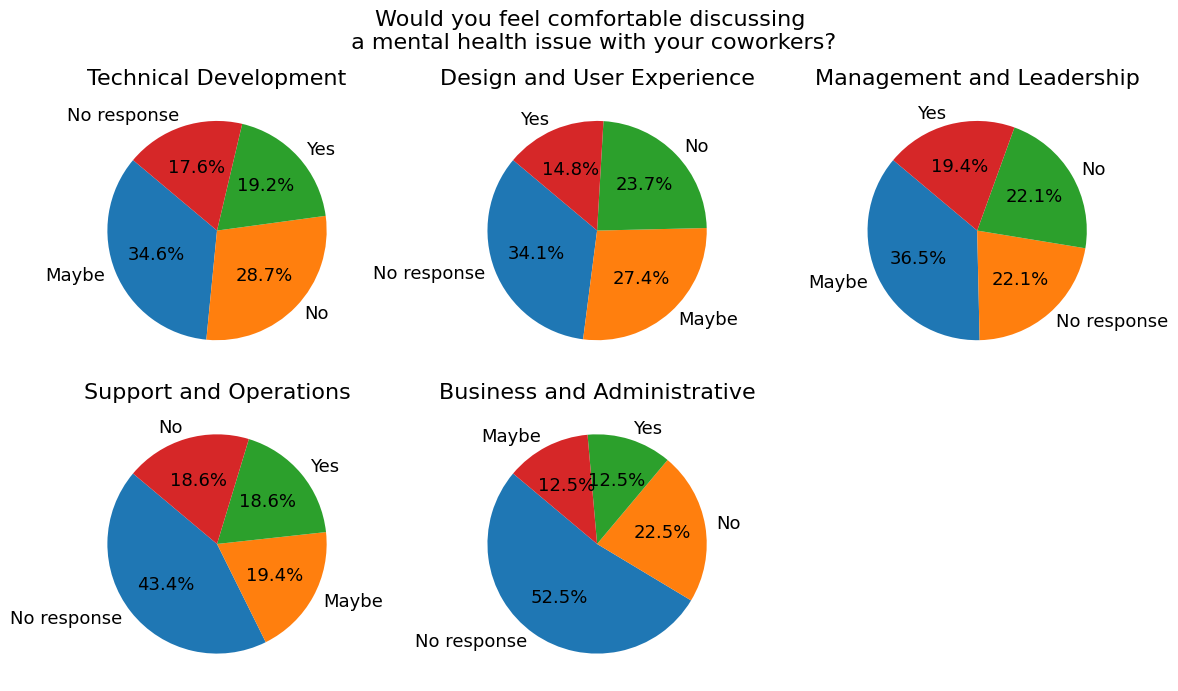

In [10]:
# Get the answers for question 18
question_id = 18
answers = df[df['QuestionID'] == question_id]

# Initialize a dictionary to store the counts for each group
group_counts = {}

# Iterate over the user groups
for group, users in user_groups.items():
    # Filter the answers for the users in the group
    group_answers = answers[answers['UserID'].isin(users)]
    # Count the unique answers for the group
    group_counts[group] = group_answers['AnswerText'].value_counts()

# Combine all pie charts into one figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
question_text = df[df['QuestionID'] == question_id]['questiontext'].iloc[0]

question_text = question_text[:37] + "\n"+question_text[37:]
fig.suptitle(question_text, fontsize=16)  # Increase the fontsize to 16
# Iterate over the user groups
for i, (group, counts) in enumerate(group_counts.items()):
    # Plot the pie chart for each group
    ax = axes[i // 3, i % 3]
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=ax, fontsize=13,figsize=(12, 7))
    ax.set_title(group, fontsize=16)
    ax.set_ylabel('')
ax = axes[5 // 3, 5 % 3]
ax.axis('off')
plt.tight_layout()
plt.show()  


 


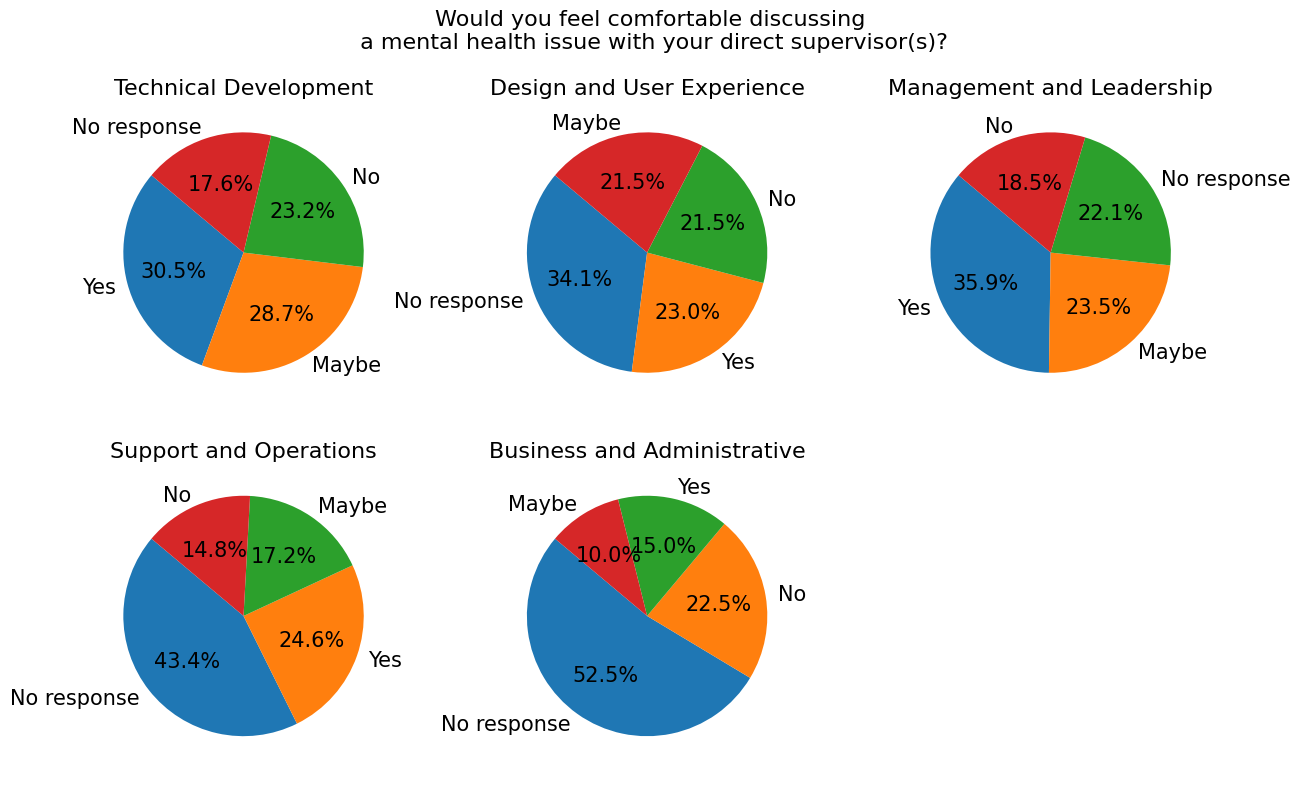

In [11]:
# Get the answers for question 18
question_id = 19
answers = df[df['QuestionID'] == question_id]

# Initialize a dictionary to store the counts for each group
group_counts = {}

# Iterate over the user groups
for group, users in user_groups.items():
    # Filter the answers for the users in the group
    group_answers = answers[answers['UserID'].isin(users)]
    # Count the unique answers for the group
    group_counts[group] = group_answers['AnswerText'].value_counts()

# Combine all pie charts into one figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
question_text = df[df['QuestionID'] == question_id]['questiontext'].iloc[0]

question_text = question_text[:37] + "\n"+question_text[37:]
fig.suptitle(question_text, fontsize=16)  # Increase the fontsize to 16
# Iterate over the user groups
for i, (group, counts) in enumerate(group_counts.items()):
    # Plot the pie chart for each group
    ax = axes[i // 3, i % 3]
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=ax, fontsize=15,figsize=(13, 8))
    ax.set_title(group, fontsize=16)
    ax.set_ylabel('')
ax = axes[5 // 3, 5 % 3]
ax.axis('off')
plt.tight_layout()
plt.show()  


 


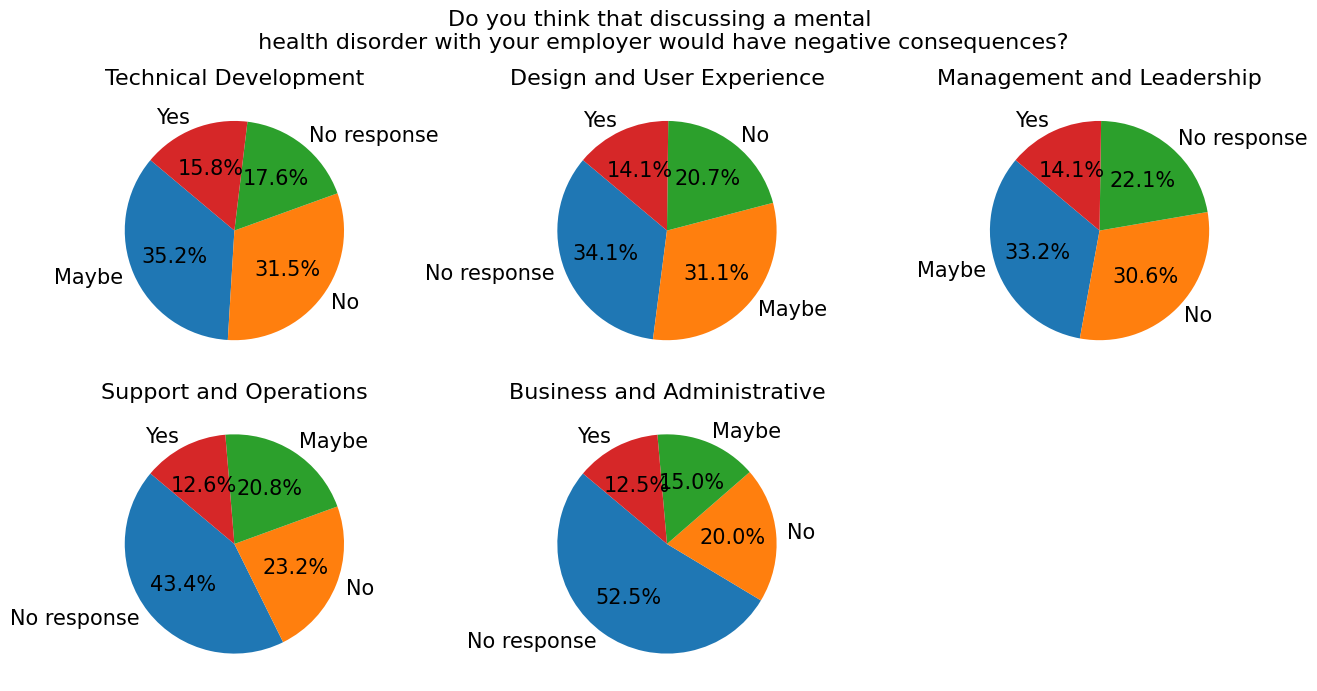

In [12]:
# Get the answers for question 18
question_id = 104
answers = df[df['QuestionID'] == question_id]

# Initialize a dictionary to store the counts for each group
group_counts = {}

# Iterate over the user groups
for group, users in user_groups.items():
    # Filter the answers for the users in the group
    group_answers = answers[answers['UserID'].isin(users)]
    # Count the unique answers for the group
    group_counts[group] = group_answers['AnswerText'].value_counts()

# Combine all pie charts into one figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
question_text = df[df['QuestionID'] == question_id]['questiontext'].iloc[0]

question_text = question_text[:37] + "\n"+question_text[37:]
fig.suptitle(question_text, fontsize=16)  # Increase the fontsize to 16
# Iterate over the user groups
for i, (group, counts) in enumerate(group_counts.items()):
    # Plot the pie chart for each group
    ax = axes[i // 3, i % 3]
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=ax, fontsize=15,figsize=(13, 7))
    ax.set_title(group, fontsize=16)
    ax.set_ylabel('')
ax = axes[5 // 3, 5 % 3]
ax.axis('off')
plt.tight_layout()
plt.show()  


 


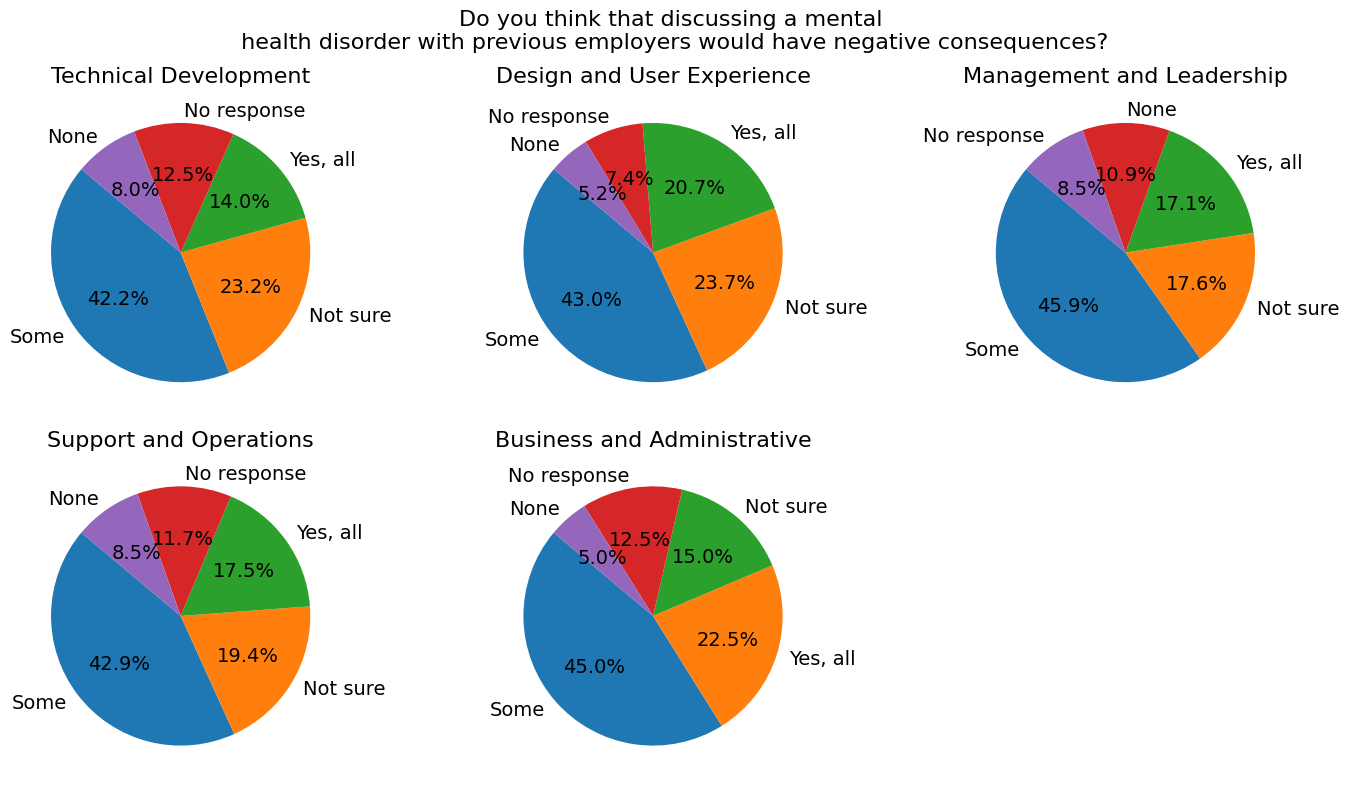

In [13]:
# Get the answers for question 18
question_id = 108
answers = df[df['QuestionID'] == question_id]

# Initialize a dictionary to store the counts for each group
group_counts = {}

# Iterate over the user groups
for group, users in user_groups.items():
    # Filter the answers for the users in the group
    group_answers = answers[answers['UserID'].isin(users)]
    # Count the unique answers for the group
    group_counts[group] = group_answers['AnswerText'].value_counts()

# Combine all pie charts into one figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
question_text = df[df['QuestionID'] == question_id]['questiontext'].iloc[0]

question_text = question_text[:37] + "\n"+question_text[37:]
fig.suptitle(question_text, fontsize=16)  # Increase the fontsize to 16
# Iterate over the user groups
for i, (group, counts) in enumerate(group_counts.items()):
    # Plot the pie chart for each group
    ax = axes[i // 3, i % 3]
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=ax, fontsize=14,figsize=(14, 8))
    ax.set_title(group, fontsize=16)
    ax.set_ylabel('')
ax = axes[5 // 3, 5 % 3]
ax.axis('off')
plt.tight_layout()
plt.show()  
